In [1]:
import pandas as pd
import re
import string
# from bs4 import BeautifulSoup
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import spacy
from nltk.probability import FreqDist
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# !pip install spacy
# !python -m spacy download en_core_web_sm
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [3]:
data_df = pd.read_csv("../rtgender/facebook_wiki_posts.csv")

In [4]:
data_df.head()

,op_id,op_gender,post_id,post_text,post_type
0,11679984,M,0,Tornado watch in effect tonight. Be safe. Plea...,photo
1,11679984,M,1,NaN,photo
2,11679984,M,2,Temps warming up for the holiday weekend! I wi...,photo
3,11679984,M,3,Showers heading this way ..,photo
4,11679984,M,4,Storm potential update...feel free to share th...,photo


In [5]:
data_df1 = data_df.copy()

In [6]:
# Load spacy
nlp = spacy.load('en_core_web_sm')

def clean_string(text, stopwords = False, stem="None"):

    final_string = ""

    # Make lower
    text = text.lower()

#     # Remove line breaks
#     text = re.sub(r'\n', '', text)

#     # Remove puncuation
#     translator = str.maketrans('', '', string.punctuation)
#     text = text.translate(translator)

    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\S+www\S+', '', text)
    
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    text = re.sub(r'\S+.com\S+', '', text)
    
    
    # Remove stop words
    text = text.split()
    text_filtered = text
    if stopwords == True:
        useless_words = nltk.corpus.stopwords.words("english")
#         useless_words = useless_words + ['hi', 'im']

        text_filtered = [word for word in text if not word in useless_words]

        # Remove numbers
        text_filtered = [re.sub(r'\w*\d\w*', '', w) for w in text_filtered]
#     else:
#         text_filtered = text
    # Stem or Lemmatize
    if stem == 'Stem':
        stemmer = PorterStemmer() 
        text_stemmed = [stemmer.stem(y) for y in text_filtered]
    elif stem == 'Lem':
        lem = WordNetLemmatizer()
        text_stemmed = [lem.lemmatize(y) for y in text_filtered]
    elif stem == 'Spacy':
        text_filtered = nlp(' '.join(text_filtered))
        text_stemmed = [y.lemma_ for y in text_filtered]
    else:
        text_stemmed = text_filtered

    final_string = ' '.join(text_stemmed)

    return final_string

In [7]:
data_df2 = data_df.copy()


In [8]:
data_df2['post_text'] = data_df2['post_text'].astype(str)

In [9]:
data_df2['post_text_cleaned'] = data_df2['post_text'].apply(lambda x: clean_string(x, stopwords = True, stem='Lem'))


In [10]:
data_df2['post_text_cleaned']

0         tornado watch effect tonight. safe. please fee...
1                                                       nan
2         temp warming holiday weekend! see next tuesday...
3                                     shower heading way ..
4         storm potential update...feel free share frien...
                                ...                        
149443                  photo: snapper medium / splash news
149444                                                  nan
149445                                                  nan
149446                                                  nan
149447                                                  nan
Name: post_text_cleaned, Length: 149448, dtype: object

In [11]:
data_df2['post_text_cleaned1'] = data_df2['post_text_cleaned'].str.split()

In [12]:
data_df2['post_text_cleaned1']

0         [tornado, watch, effect, tonight., safe., plea...
1                                                     [nan]
2         [temp, warming, holiday, weekend!, see, next, ...
3                                [shower, heading, way, ..]
4         [storm, potential, update...feel, free, share,...
                                ...                        
149443           [photo:, snapper, medium, /, splash, news]
149444                                                [nan]
149445                                                [nan]
149446                                                [nan]
149447                                                [nan]
Name: post_text_cleaned1, Length: 149448, dtype: object

In [13]:
data_df2['post_text_cleaned']

0         tornado watch effect tonight. safe. please fee...
1                                                       nan
2         temp warming holiday weekend! see next tuesday...
3                                     shower heading way ..
4         storm potential update...feel free share frien...
                                ...                        
149443                  photo: snapper medium / splash news
149444                                                  nan
149445                                                  nan
149446                                                  nan
149447                                                  nan
Name: post_text_cleaned, Length: 149448, dtype: object

In [14]:
data_df2.to_csv("./preprocessed_data/facebook_wiki_posts_preprocssed_lem_stopwords_removal.csv")

In [15]:
all_words1 = ''
all_words = data_df2.groupby(['op_gender']).agg({'post_text_cleaned': ' '.join}).reset_index()
print(all_words)


  op_gender                                  post_text_cleaned
0         M  tornado watch effect tonight. safe. please fee...
1         W  enjoyed great shooting day "don't let count ou...


In [16]:



all_words[all_words['op_gender']=='M']['post_text_cleaned']

0    tornado watch effect tonight. safe. please fee...
Name: post_text_cleaned, dtype: object

In [17]:
#the NLTK FreqDist gives a count for how often each part of the text occurs
fd_wct1_M = FreqDist(all_words[all_words['op_gender']=='M']['post_text_cleaned'][0].split())
# fd_wct1_M

In [18]:
fd_wct1_F = FreqDist(all_words[all_words['op_gender']=='W']['post_text_cleaned'].values[0].split(" "))


In [19]:
print(fd_wct1_M.most_common(40))


[('-', 6029), ('nan', 5351), ('new', 4063), ('michael', 3366), ('time', 3257), ('beckwith', 3107), ('bernard', 3074), ('&', 2855), ('see', 2801), ('like', 2763), ('.', 2688), ('day', 2647), ('u', 2632), ('one', 2559), ('get', 2505), ('great', 2487), ("i'm", 2455), ('live', 2066), (',', 2037), (':', 1947), ('show', 1924), ('good', 1919), ('make', 1834), ('love', 1765), ('today', 1747), ('join', 1713), ('know', 1678), ('go', 1668), ('right', 1639), ('tonight', 1622), ('last', 1570), ('want', 1523), ('back', 1496), ('agape', 1491), ('life', 1425), ('would', 1413), ('people', 1385), ('real', 1288), ('friend', 1279), ('watch', 1264)]


In [20]:
print(fd_wct1_F.most_common(40))


[('', 31401), ('-', 12249), ('nan', 11081), ('&', 8312), ('new', 6962), ('.', 6856), ('x', 6708), ('de', 6493), (',', 6364), ('get', 5999), ('rest', 5338), ('la', 5272), ("i'm", 5119), ('love', 4930), ('day', 4576), ('one', 4443), ('see', 4325), ('u', 4069), ('like', 3972), ('great', 3922), ('en', 3857), ('last', 3709), ('time', 3591), ('check', 3303), ('make', 3287), ('back', 3279), ('good', 3251), ('know', 3238), ('happy', 3138), ('today', 3091), ('go', 3041), (':', 3005), ('thank', 2894), ('show', 2735), ('tonight', 2638), ('want', 2598), ('say', 2575), ('rt', 2574), (':)', 2551), ('god', 2541)]


In [21]:
fd_wct1_M

FreqDist({'-': 6029, 'nan': 5351, 'new': 4063, 'michael': 3366, 'time': 3257, 'beckwith': 3107, 'bernard': 3074, '&': 2855, 'see': 2801, 'like': 2763, ...})

In [22]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_df2['post_text_cleaned'])
features = vectorizer.get_feature_names_out()
y = data_df2['op_gender']

In [23]:
print(features[:30])

['__' '___' '____' '_____' '______' '________' '_________' '__________'
 '___________' '______________' '_______________' '________________'
 '_________________' '_____________________' '__________________________'
 '______________________________'
 '________________________________________________________________________'
 '_______to' '___phobic' '_weird' 'aa' 'aaa' 'aaaaaaaaaaaaaat'
 'aaaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhhh' 'aaaaaaaaahh' 'aaaaaaaahh'
 'aaaaaaaahhhh' 'aaaaaaaahhhhh' 'aaaaaaaahhhhhh' 'aaaaaaaand']


In [24]:
X.shape, len(y), len(features)

((149448, 66643), 149448, 66643)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf.predict(X[:2, :]))
print(clf.predict_proba(X[:2, :]))
# >>> clf.score(X, y)

['M' 'W']
[[0.71488213 0.28511787]
 [0.32052571 0.67947429]]


In [27]:
y[:2]

0    M
1    M
Name: op_gender, dtype: object

In [28]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
# grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid = dict(penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=5,  shuffle = True, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.814192 using {'C': 1.0, 'penalty': 'l2'}
0.805533 (0.001544) with: {'C': 100, 'penalty': 'l2'}
0.808519 (0.002126) with: {'C': 10, 'penalty': 'l2'}
0.814192 (0.001252) with: {'C': 1.0, 'penalty': 'l2'}
0.802657 (0.000870) with: {'C': 0.1, 'penalty': 'l2'}
0.762229 (0.001184) with: {'C': 0.01, 'penalty': 'l2'}


In [29]:
test_pred = grid_result.predict(X_test)
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, test_pred)
print("test accuracy : ", test_acc)

test accuracy :  0.8156859564459223


In [30]:
all_pred = grid_result.predict(X)
from sklearn.metrics import accuracy_score
all_acc = accuracy_score(y, all_pred)
print("overall accuracy : ", all_acc)

overall accuracy :  0.8530258016166158


In [31]:
grid_result.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [32]:
# get importance
importance = grid_result.best_estimator_.coef_[0]
feature_importance = pd.DataFrame({"importance":importance, "features":features})
feature_importance

,importance,features
0,-0.101008,__
1,-0.349307,___
2,0.316264,____
3,0.000000,_____
4,0.488973,______
...,...,...
66638,0.002246,黄羨淩
66639,0.145149,黎小田
66640,0.165548,많이
66641,0.165548,받으세요


In [33]:
feature_importance.sort_values(['importance'],  key=abs, inplace=True)
feature_importance


,importance,features
41021,0.000000,officiated
52031,0.000000,sculpted
23511,0.000000,gamexane
23509,0.000000,gameset
8227,0.000000,busboard
...,...,...
65804,3.918064,yhoo
5400,-3.969452,beckwith
64345,4.179811,wgn
63048,-4.322925,vincentmward


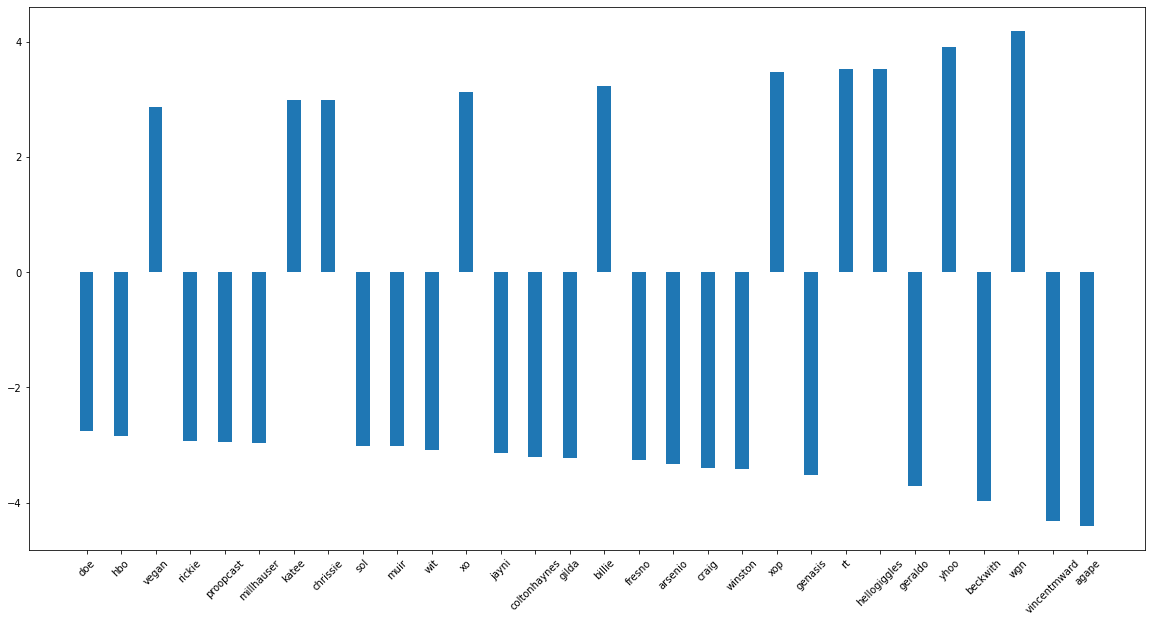

In [34]:
# plot feature importance
plt.figure(figsize=(20, 10))
plt.bar(feature_importance['features'][-30:], feature_importance['importance'][-30:], width = 0.4)
plt.xticks(rotation=45)
plt.show()

In [35]:
# visualize most freuquent words

In [36]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_df2['post_text_cleaned'])
features = vectorizer.get_feature_names_out()
y = data_df2['op_gender']

In [37]:
print(features[:30])

['__' '___' '____' '_____' '______' '________' '_________' '__________'
 '___________' '______________' '_______________' '________________'
 '_________________' '_____________________' '__________________________'
 '______________________________'
 '________________________________________________________________________'
 '_______to' '___phobic' '_weird' 'aa' 'aaa' 'aaaaaaaaaaaaaat'
 'aaaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhhh' 'aaaaaaaaahh' 'aaaaaaaahh'
 'aaaaaaaahhhh' 'aaaaaaaahhhhh' 'aaaaaaaahhhhhh' 'aaaaaaaand']


In [38]:
X.shape, len(y), len(features)

((149448, 66643), 149448, 66643)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf.predict(X[:2, :]))
print(clf.predict_proba(X[:2, :]))
# >>> clf.score(X, y)

['M' 'W']
[[0.72980957 0.27019043]
 [0.32212182 0.67787818]]


In [41]:
y[:2]

0    M
1    M
Name: op_gender, dtype: object

In [42]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
# grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid = dict(penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=5,  shuffle = True, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.814481 using {'C': 10, 'penalty': 'l2'}
0.809228 (0.001614) with: {'C': 100, 'penalty': 'l2'}
0.814481 (0.001737) with: {'C': 10, 'penalty': 'l2'}
0.809687 (0.001524) with: {'C': 1.0, 'penalty': 'l2'}
0.758005 (0.001856) with: {'C': 0.1, 'penalty': 'l2'}
0.693169 (0.000774) with: {'C': 0.01, 'penalty': 'l2'}


In [43]:
test_pred = grid_result.predict(X_test)
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, test_pred)
print("test accuracy : ", test_acc)

test accuracy :  0.8182408045743947


In [44]:
all_pred = grid_result.predict(X)
from sklearn.metrics import accuracy_score
all_acc = accuracy_score(y, all_pred)
print("overall accuracy : ", all_acc)

overall accuracy :  0.8517745302713987


In [45]:
grid_result.best_params_

{'C': 10, 'penalty': 'l2'}

In [46]:
# get importance
importance = grid_result.best_estimator_.coef_[0]
feature_importance = pd.DataFrame({"importance":importance, "features":features})
feature_importance

,importance,features
0,0.429063,__
1,-0.967096,___
2,0.835522,____
3,0.000000,_____
4,1.066087,______
...,...,...
66638,0.021055,黄羨淩
66639,0.848296,黎小田
66640,0.370884,많이
66641,0.370884,받으세요


In [47]:
feature_importance.sort_values(['importance'],  key=abs, inplace=True)
feature_importance


,importance,features
62035,0.000000,urrutia
27016,0.000000,hibernation
42439,0.000000,papeles
53246,0.000000,shohadaie
53250,0.000000,shondaland
...,...,...
5811,-19.912957,bernard
1137,-20.063372,agape
23959,-20.378283,geraldo
5400,-21.922513,beckwith


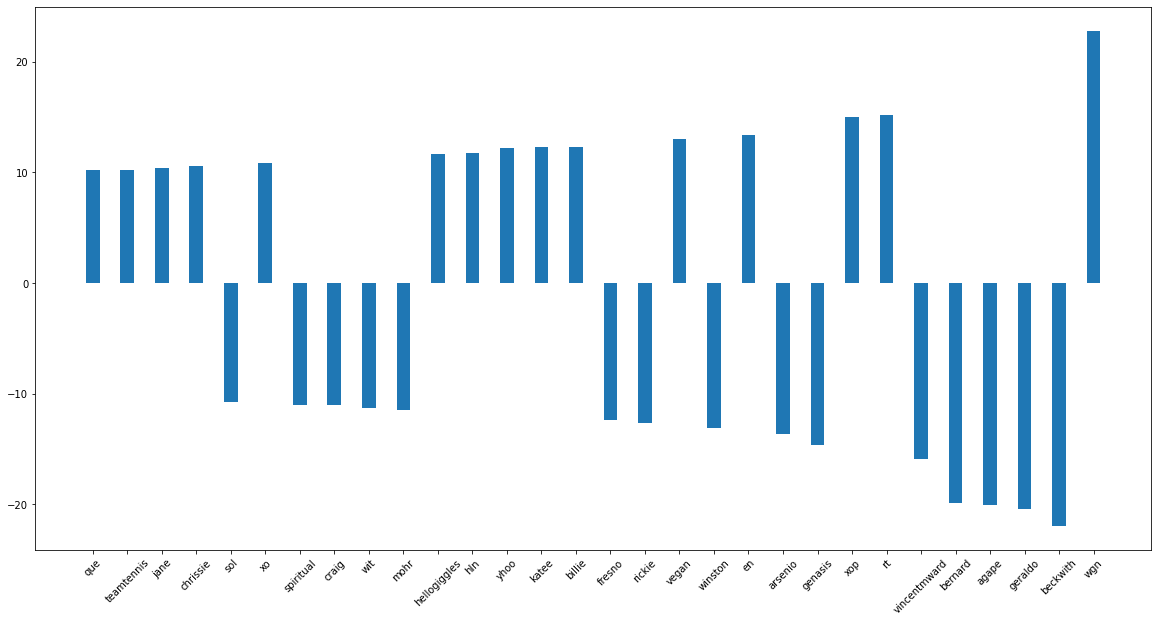

In [48]:
# plot feature importance
plt.figure(figsize=(20, 10))
plt.bar(feature_importance['features'][-30:], feature_importance['importance'][-30:], width = 0.4)
plt.xticks(rotation=45)
plt.show()

In [49]:
# visualize most freuquent words 

In [50]:
df_M = pd.DataFrame(fd_wct1_M.items(), columns=['word', 'n'])
cnt = 0 
total_words_M = sum(fd_wct1_M.values())
df_M['total_words'] = total_words_M
df_M['gender'] ='M'
df_M

,word,n,total_words,gender
0,tornado,64,724944,M
1,watch,1264,724944,M
2,effect,70,724944,M
3,tonight.,296,724944,M
4,safe.,38,724944,M
...,...,...,...,...
80875,"chris""",1,724944,M
80876,bullseye.,1,724944,M
80877,imchrisrock:,2,724944,M
80878,merch!,1,724944,M


In [51]:
df_F = pd.DataFrame(fd_wct1_F.items(), columns=['word', 'n'])
cnt = 0 
total_words_F = sum(fd_wct1_F.values())
df_F['total_words'] = total_words_F
df_F['gender'] ='W'
df_F

,word,n,total_words,gender
0,enjoyed,165,1363127,W
1,great,3922,1363127,W
2,shooting,528,1363127,W
3,day,4576,1363127,W
4,"""don't",45,1363127,W
...,...,...,...,...
129923,moment.getting,1,1363127,W
129924,charleston.im,1,1363127,W
129925,announced..,1,1363127,W
129926,gleijm,1,1363127,W


In [52]:
df_all_for_R = pd.concat([df_M, df_F])
df_all_for_R

,word,n,total_words,gender
0,tornado,64,724944,M
1,watch,1264,724944,M
2,effect,70,724944,M
3,tonight.,296,724944,M
4,safe.,38,724944,M
...,...,...,...,...
129923,moment.getting,1,1363127,W
129924,charleston.im,1,1363127,W
129925,announced..,1,1363127,W
129926,gleijm,1,1363127,W


In [53]:
df_all_for_R.to_csv("./preprocessed_data/facebook_wiki_posts_preprocressed_for_R.csv")

In [54]:
# after running R codes for weighted log odds

In [55]:
weighted_log_odds_df = pd.read_csv("./preprocessed_data/facebook_wiki_post_weighted_log_odds.csv")
weighted_log_odds_df.sort_values(['log_odds_weighted'], inplace=True)

In [56]:
weighted_log_odds_df

,Unnamed: 0,X,word,n,total_words,gender,log_odds_weighted
134943,134944,54063,bernard,6,1363127,W,-25.500846
82017,82018,1137,michael,392,1363127,W,-23.844820
5452,5453,5452,x,91,724944,M,-17.847154
121,122,121,de,127,724944,M,-17.240748
237,238,237,rest,185,724944,M,-14.911217
...,...,...,...,...,...,...,...
5102,5103,5102,michael,3366,724944,M,25.056316
17377,17378,17377,bernard,3074,724944,M,26.242522
31739,31740,31739,agape,1491,724944,M,32.359729
31746,31747,31746,beckwith,3107,724944,M,46.752688


In [57]:
weighted_log_odds_df = weighted_log_odds_df.dropna()
weighted_log_odds_df

,Unnamed: 0,X,word,n,total_words,gender,log_odds_weighted
134943,134944,54063,bernard,6,1363127,W,-25.500846
82017,82018,1137,michael,392,1363127,W,-23.844820
5452,5453,5452,x,91,724944,M,-17.847154
121,122,121,de,127,724944,M,-17.240748
237,238,237,rest,185,724944,M,-14.911217
...,...,...,...,...,...,...,...
81022,81023,142,billie,1046,1363127,W,18.350299
5102,5103,5102,michael,3366,724944,M,25.056316
17377,17378,17377,bernard,3074,724944,M,26.242522
31739,31740,31739,agape,1491,724944,M,32.359729


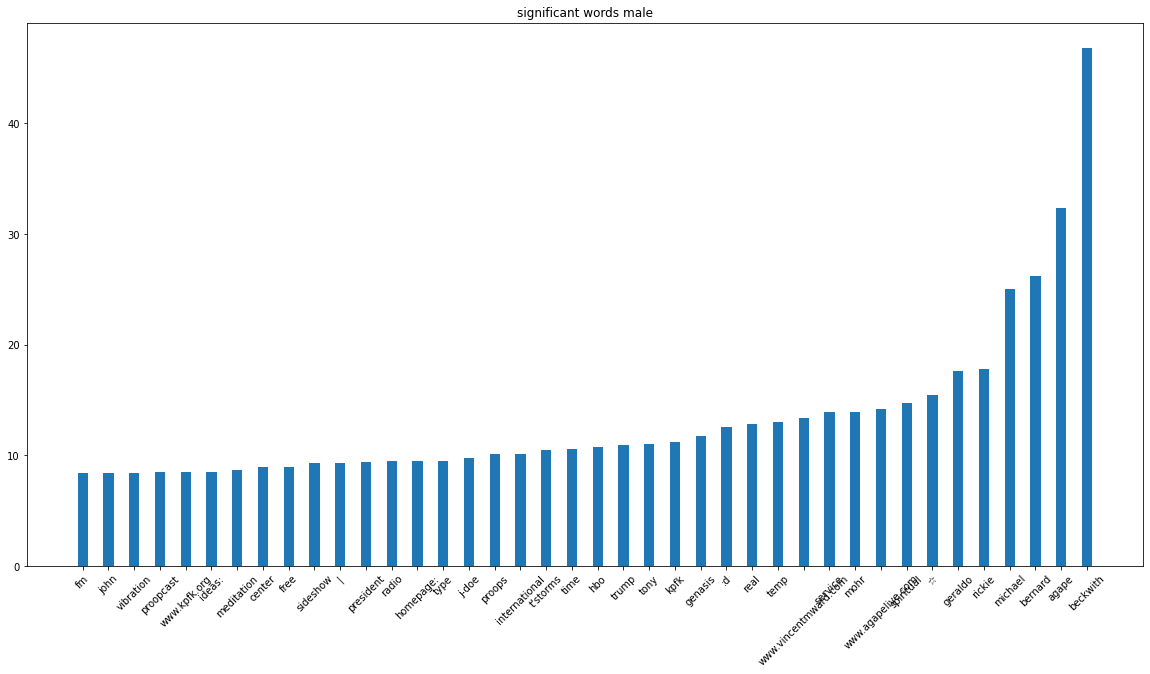

In [58]:
filtered_df = weighted_log_odds_df[weighted_log_odds_df['gender']=='M']
plt.figure(figsize=(20, 10))
plt.bar(filtered_df['word'][-40:], filtered_df['log_odds_weighted'][-40:], width=0.4)
plt.title("significant words male")
plt.xticks(rotation=45)
plt.show()

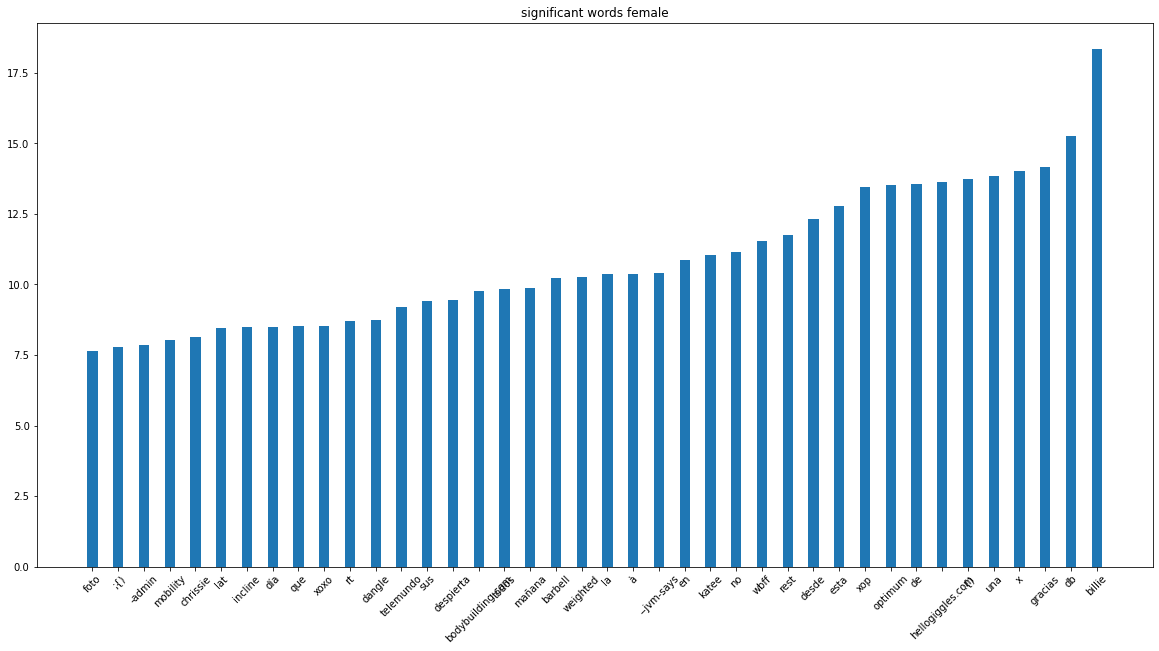

In [59]:
filtered_df = weighted_log_odds_df[weighted_log_odds_df['gender']=='W']
plt.figure(figsize=(20, 10))
plt.bar(filtered_df['word'][-40:], filtered_df['log_odds_weighted'][-40:], width=0.4)
plt.title("significant words female")
plt.xticks(rotation=45)
plt.show()